<font color='green'> 
**Youtube - Aladdin Persson Kanalı - TensorFlow 2.0 Beginner Tutorials serisi**
    
TensorFlow Tutorial 7 - More in Depth Example on Functional API - Aladdin Persson anlattı.
</font>

**Video:** [TensorFlow Tutorial 7 - More in Depth Example on Functional API](https://www.youtube.com/watch?v=gRRGr_tJnAA&list=PLhhyoLH6IjfxVOdVC1P1L5z5azs0XjMsb&index=7)

### İçindekiler

**Loading Dataset**

**Preprocessing Dataset**

**Creating Convolutional Neural Network**
* Functional API kullanarak modeli oluşturduk. Birden fazla outputu olduğu için burada functional api kullanmak daha mantıklıydı.

### Kaynaklar

* `train_dataset = (train_dataset.shuffle(buffer_size=len(train_labels))` kodundaki buffer_size mevzusunu anlayabilmek için [TensoFlow tf.data.dataset: Repeat, Batch, Shuffle - explained!](https://www.youtube.com/watch?v=c7G5W4Wv72Q) videosunu izleyebilirsin.


* Tensorflowda `tf.data.Dataset.from_tensor_slices` ile nasıl data okunduğunu görmek için [Input Data Pipelines - TensorFlow Essentials #4 (Data Okuma Şekilleri)](https://github.com/eliffkkurt/MyRoadmap/blob/main/TensorFlow/6.%20Input%20Data%20Pipelines%20-%20TensorFlow%20Essentials%20%234%20(Data%20Okuma%20%C5%9Eekilleri).ipynb) notebookuna bakabilirsin.

####  <font color="gray"> **Not:** `model.fit(train_dataset,epochs=5, verbose=2)` kodu hata verdi. </font>

* Google colabde çalıştırınca aşağıdaki hatayı verdi.

```
NotFoundError:  /content/gdrive/My Drive/Personal Studies/Artificial Intelligence/Tensorflow Tutorial 2.0 Beginner Tutorials (Youtube - Aladdin Persson)/train_images/410_14.png; No such file or directory
	 [[{{node ReadFile}}]]
	 [[IteratorGetNext]] [Op:__inference_train_function_1632]

Function call stack:
train_function
```
* Jupyter Notebookta çalıştırınca aşağıdaki hatayı verdi. 

```
'utf-8' codec can't decode byte 0xfd in position 275: invalid start byte
```

İkisini de gideremedim.

### <font color="blue"> Giriş</font>

In [1]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers

### 1. Loading Dataset

Her resim iki rakamdan oluşuyor, iki etiketi var yani.

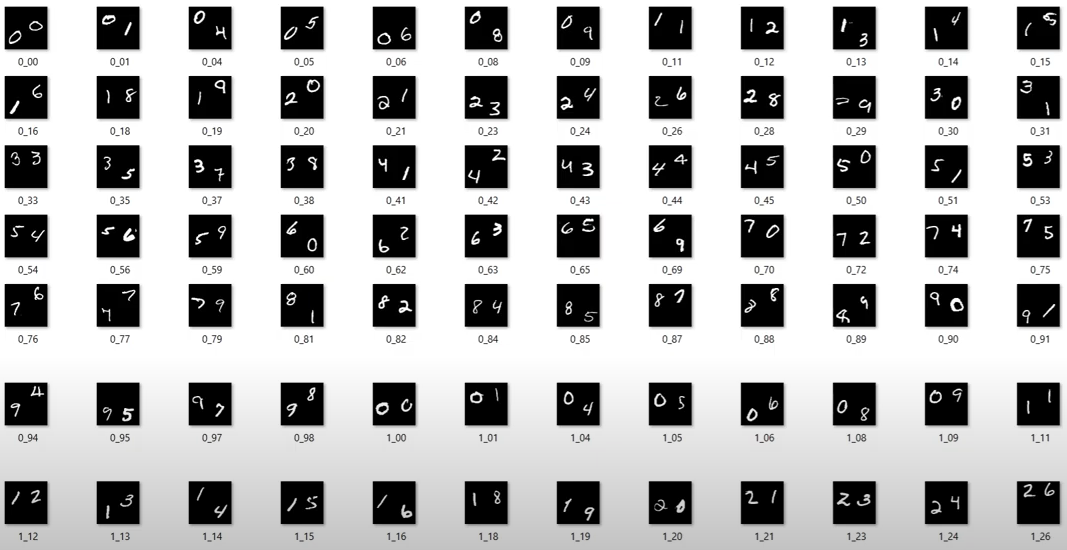

In [2]:
from tensorflow.keras.datasets import mnist
# Use Pandas to load dataset from csv file
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

import os
os.chdir("/content/gdrive/My Drive/Personal Studies/Artificial Intelligence/Tensorflow Tutorial 2.0 Beginner Tutorials (Youtube - Aladdin Persson)")

Mounted at /content/gdrive


In [4]:
# burada resimleri csv dosyası olarak load ettik image olarak değil (önceki notebooklardan farklı).
train_df = pd.read_csv("train.csv")  
test_df = pd.read_csv("test.csv")

In [5]:
print(train_df.shape)  
print(test_df.shape)

(64000, 3)
(20000, 3)


### 2. Preprocessing Dataset

Train ve test seti x ve y'sine ayıracağız.

In [ ]:
train_df.iloc[::]

,Image,first_num,second_num
0,0_00.png,0,0
1,100_00.png,0,0
2,101_00.png,0,0
3,102_00.png,0,0
4,103_00.png,0,0
...,...,...,...
63995,997_98.png,9,8
63996,998_98.png,9,8
63997,999_98.png,9,8
63998,99_98.png,9,8


In [ ]:
train_df.iloc[:,0]

0          0_00.png
1        100_00.png
2        101_00.png
3        102_00.png
4        103_00.png
            ...    
63995    997_98.png
63996    998_98.png
63997    999_98.png
63998     99_98.png
63999      9_98.png
Name: Image, Length: 64000, dtype: object

In [ ]:
# resimleri alıyoruz bununla.
train_df.iloc[:,0].values

array(['0_00.png', '100_00.png', '101_00.png', ..., '999_98.png',
       '99_98.png', '9_98.png'], dtype=object)

**os modülünün getcwd() fonksiyonu bize o anda içinde bulunduğumuz dizinin adını verir.**

In [6]:
os.getcwd()

'/content/gdrive/My Drive/Personal Studies/Artificial Intelligence/Tensorflow Tutorial 2.0 Beginner Tutorials (Youtube - Aladdin Persson)'

##### <font color="blue">Burada x'lerin pathini alıyoruz.</font>

In [7]:
train_images = os.getcwd() + "/train_images/" + train_df.iloc[:, 0].values
test_images = os.getcwd() + "/test_images/" + test_df.iloc[:, 0].values

In [8]:
print(train_images)  # x kısmı

['/content/gdrive/My Drive/Personal Studies/Artificial Intelligence/Tensorflow Tutorial 2.0 Beginner Tutorials (Youtube - Aladdin Persson)/train_images/0_00.png'
 '/content/gdrive/My Drive/Personal Studies/Artificial Intelligence/Tensorflow Tutorial 2.0 Beginner Tutorials (Youtube - Aladdin Persson)/train_images/100_00.png'
 '/content/gdrive/My Drive/Personal Studies/Artificial Intelligence/Tensorflow Tutorial 2.0 Beginner Tutorials (Youtube - Aladdin Persson)/train_images/101_00.png'
 ...
 '/content/gdrive/My Drive/Personal Studies/Artificial Intelligence/Tensorflow Tutorial 2.0 Beginner Tutorials (Youtube - Aladdin Persson)/train_images/999_98.png'
 '/content/gdrive/My Drive/Personal Studies/Artificial Intelligence/Tensorflow Tutorial 2.0 Beginner Tutorials (Youtube - Aladdin Persson)/train_images/99_98.png'
 '/content/gdrive/My Drive/Personal Studies/Artificial Intelligence/Tensorflow Tutorial 2.0 Beginner Tutorials (Youtube - Aladdin Persson)/train_images/9_98.png']


In [9]:
type(train_images)

numpy.ndarray

##### <font color="blue">Burada y değerlerini alıyoruz.</font>

In [10]:
train_labels = train_df.iloc[:, 1:].values
test_labels = test_df.iloc[:, 1:].values

In [ ]:
train_labels # 2'şer tane labelları var resimlerin.

array([[0, 0],
       [0, 0],
       [0, 0],
       ...,
       [9, 8],
       [9, 8],
       [9, 8]], dtype=int64)

In [ ]:
print(train_labels) # y kısmı

[[0 0]
 [0 0]
 [0 0]
 ...
 [9 8]
 [9 8]
 [9 8]]


##### <font color="blue">Pathten resmi okuyup resmi ve 2 labelı ayrı ayrı dönen bir fonksiyon yazıyoruz.</font>

*   **`tf.io.read_file` komutu pathten dosyayı okur.**
*   **`tf.image.decode_image` komutu resmin BMP, GIF, JPEG veya PNG mi olduğunu tespit eder ve string byte'ları Tensor tipine dönüştürmek için uygun operasyonu yapar.** 


In [11]:
def read_image(image_path, label):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_image(image, channels=1, dtype=tf.float32) # channel: Number of color channels for the decoded image. (greyscale:1, rgb:3)
    image.set_shape((64, 64, 1))
    label[0].set_shape([])  # bunu anlayamadım
    label[1].set_shape([])
    labels = {"first_num": label[0], "second_num": label[1]}
    return image, labels

##### Kendi Çalışmam

With the help of `tf.data.Dataset.from_tensor_slices()` method, we can get the slices of an array in the form of objects.

In [ ]:
import tensorflow as tf
  
# using tf.data.Dataset.from_tensor_slices() method
gfg = tf.data.Dataset.from_tensor_slices([[5, 10], [3, 6]])
  
for ele in gfg:
    print(ele.numpy())

[ 5 10]
[3 6]


[TensoFlow tf.data.dataset: Repeat, Batch, Shuffle - explained!](https://www.youtube.com/watch?v=c7G5W4Wv72Q) videosu `train_dataset = (train_dataset.shuffle(buffer_size=len(train_labels))` kodundaki shuffle olayını güzel görselleştirmiş.

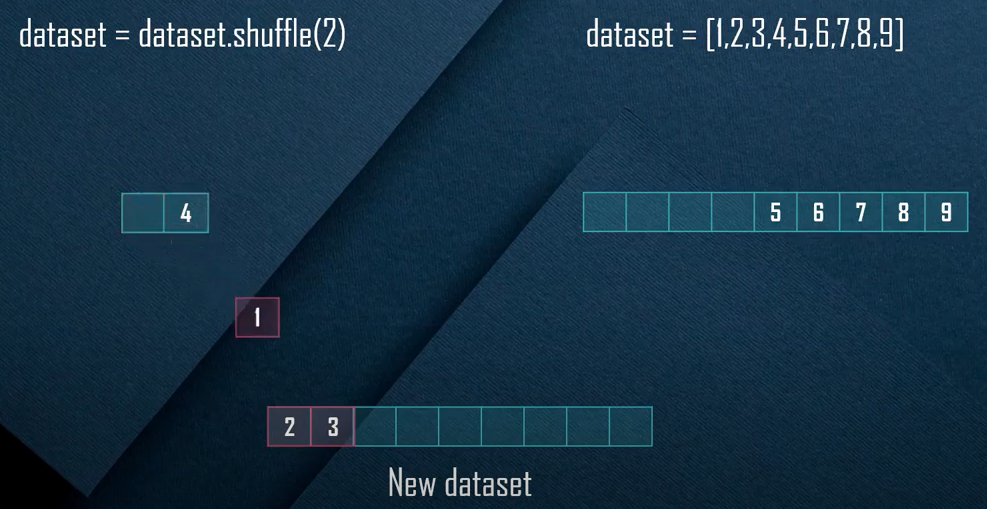

##### ---

####  <font color="blue">Specifying HyperParameters</font>

In [12]:
BATCH_SIZE = 64
WEIGHT_DECAY = 0.001  # regularization technique by adding a small penalty
LEARNING_RATE = 0.001

In [13]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_dataset = tf.data.Dataset.from_tensor_slices(
    (train_images, train_labels) #pathler ve labellar
)

In [14]:
train_dataset = (train_dataset.shuffle(buffer_size=len(train_labels))  
.map(read_image)  # yukarıda yazdığımız fonksiyonu uyguluyoruz datasetine.
.batch(batch_size=BATCH_SIZE)
.prefetch(buffer_size=AUTOTUNE)  # performansla ilgili bir işlem
)

In [15]:
test_dataset = tf.data.Dataset.from_tensor_slices(
    (test_images, test_labels)  #pathler ve labellar
)

In [16]:
test_dataset = (test_dataset.map(read_image)
.batch(batch_size=BATCH_SIZE)
.prefetch(buffer_size=AUTOTUNE)
)

Her örnek için iki labelımız var. Burada sequential API kullanamayız. Sequential API bir inputu bir outputa mapliyordu sadece. Ama burada iki outputumuz var. 

### 3. Creating Convolutional Neural Newtork

##### <font color="green"> Functional API kullanarak layerlarımızı yazıyoruz. </font>

In [17]:
inputs = keras.Input(shape = (64, 64, 1))   # 64x64 pixel ve 1 channel'dan oluşuyor resimlerimiz
x = layers.Conv2D (
    filters=32,
    kernel_size=3,
    padding='same',
    kernel_regularizer = regularizers.l2(WEIGHT_DECAY),
)(inputs)
x = layers.BatchNormalization()(x)
x = keras.activations.relu(x)
x = layers.Conv2D(64, 3, kernel_regularizer=regularizers.l2(WEIGHT_DECAY))(x)
x = layers.BatchNormalization()(x)
x = keras.activations.relu(x)
x = layers.MaxPooling2D()(x)
x = layers.Conv2D (64,3, activation='relu', kernel_regularizer=regularizers.l2(WEIGHT_DECAY))(x)
x = layers.MaxPooling2D()(x)
x = layers.Flatten()(x)
x = layers.Dense(128, activation = 'relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation='relu')(x)
output1 = layers.Dense(10, activation='softmax', name='first_num')(x)
output2 = layers.Dense(10, activation='softmax', name='second_num')(x) 
model = keras.Model(inputs=inputs, outputs=[output1, output2])


# tek inputumuz var x olarak ama iki farklı outputumuz var. 
# output kısmına kadar sequential sonrasını functional da yapabilirdin.

In [18]:
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 64, 64, 32)   320         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 64, 64, 32)   128         conv2d[0][0]                     
__________________________________________________________________________________________________
tf.nn.relu (TFOpLambda)         (None, 64, 64, 32)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

##### <font color="green"> `model.compile()` içerisinde ağımızın eğitim bölümünü nasıl yapılandıracağımızı anlatıyoruz kerasa. </font>

In [19]:
model.compile(
    optimizer=keras.optimizers.Adam(LEARNING_RATE),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"],
)

##### <font color="green"> `model.fit()` ile yapılandırdığımız modeli somut olarak eğitiyoruz. </font>

In [24]:
print(tf.__version__)

2.6.0


In [21]:
tf-nightly==2.2.0.dev20200218

SyntaxError: ignored

In [20]:
model.fit(train_dataset,epochs=5, verbose=2) 

Epoch 1/5


NotFoundError: ignored

##### <font color="green"> `model.evaluate()` ile test setimizi gönderip modelimizin başarısını değerlendiriyoruz. </font>

In [ ]:
model.evaluate(test_dataset, verbose=2)